<a href="https://colab.research.google.com/github/Zaxzz/kecerdasan_buatan/blob/main/UTS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS KECERDASANN BUATAN

In [5]:
!pip install seaborn

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

## GAMBARAN BESAR DATA AIRBNB

## 1. Properti Data

In [23]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 2. Cek Missing Values

In [48]:
df_airbnb.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


## 3. Jumlah Data

In [52]:
rows, cols = df_airbnb.shape
print(f"Jumlah data (baris): {rows}")
print(f"Jumlah kolom: {cols}")


Jumlah data (baris): 48884
Jumlah kolom (fitur): 16


## 4. Mean Median, dll

In [53]:
df_airbnb.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,38833.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.373128,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.680391,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## 5. Standar Deviasi

In [56]:
std_deviation = df_airbnb.std(numeric_only=True)
print("Standar Deviasi per kolom numerik:")
std_deviation


Standar Deviasi per kolom numerik:


,0
id,1.098432e+07
host_id,7.861666e+07
latitude,5.453177e-02
longitude,4.615874e-02
price,2.401703e+02
minimum_nights,2.051222e+01
number_of_reviews,4.455133e+01
reviews_per_month,1.680391e+00
calculated_host_listings_count,3.295619e+01
availability_365,1.316273e+02


##  6. Harga Minimal, Maksimal. dan Perbandingan

In [57]:
df_airbnb = df_airbnb[df_airbnb['price'] > 0]

min_price = df_airbnb['price'].min()
max_price = df_airbnb['price'].max()

print(f"Harga minimum: ${min_price}")
print(f"Harga maksimum: ${max_price}")
print(f"Perbandingan Max / Min Price: {max_price} / {min_price} = {max_price / min_price:.1f}x")


Harga minimum: $10
Harga maksimum: $10000
Perbandingan Max / Min Price: 10000 / 10 = 1000.0x


## 7. Distribusi Harga

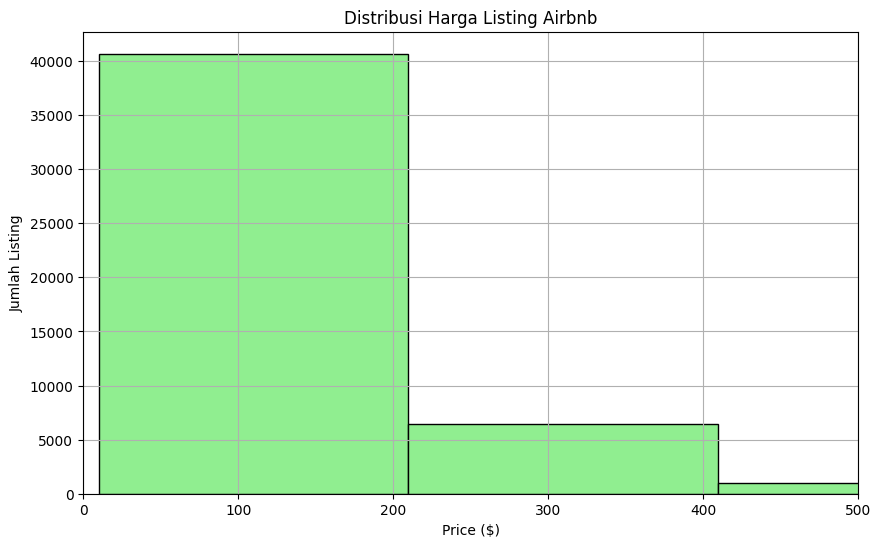

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_airbnb['price'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribusi Harga Listing Airbnb')
plt.xlabel('Price ($)')
plt.ylabel('Jumlah Listing')
plt.xlim(0, 500)
plt.grid(True)
plt.show()


## 8. Korelasi antar Variabel Numerik

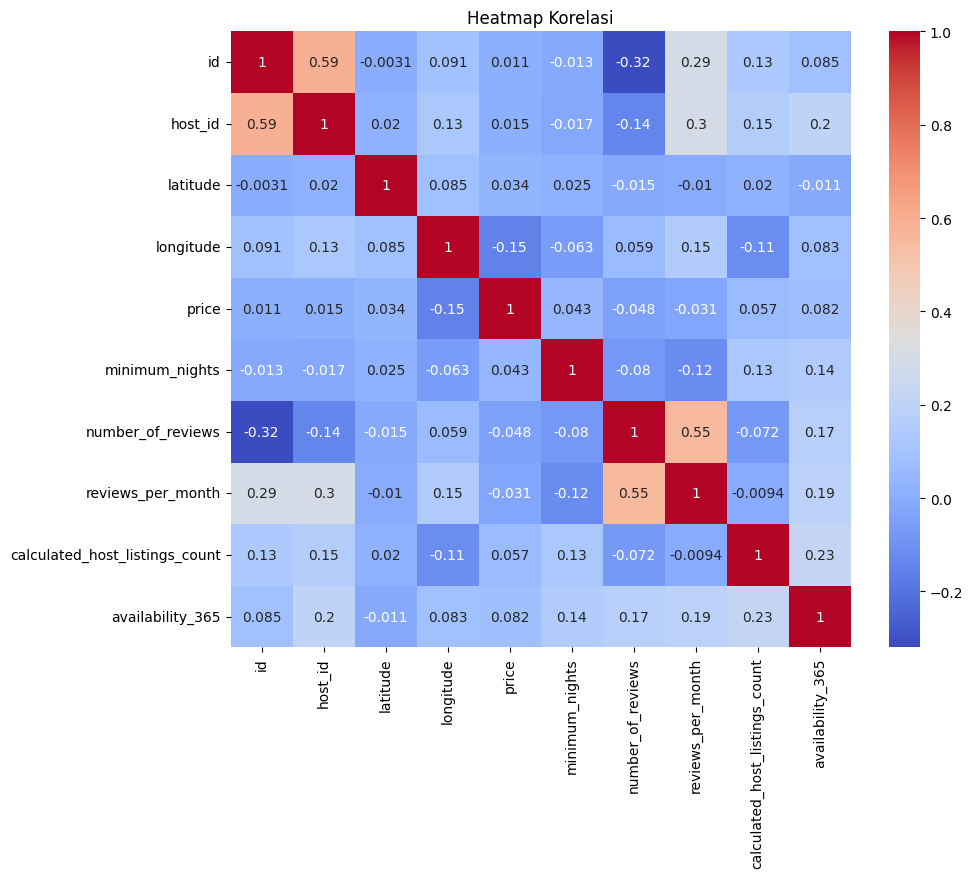

In [40]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df_airbnb.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()


## 9. Perbandingan Harga berdasarkan Kategori (Room Type, Neighbourhood)

In [59]:
if 'room_type' in df_airbnb.columns:
    room_summary = df_airbnb.groupby('room_type')['price'].describe()
    print("Ringkasan Harga berdasarkan Room Type:")
    print(room_summary)


Ringkasan Harga berdasarkan Room Type:


In [47]:
if 'neighbourhood' in df_airbnb.columns:
    neighborhood_price = df_airbnb.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
    print("Harga Rata-Rata berdasarkan Neighbourhood:")
    print(neighborhood_price.head(10))

Harga Rata-Rata berdasarkan Neighbourhood:
neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Prince's Bay         409.500000
Battery Park City    367.557143
Flatiron District    341.925000
Randall Manor        336.000000
NoHo                 295.717949
Name: price, dtype: float64


## PANDAS

### 1. Read

In [4]:
df_airbnb = pd.read_csv('./airbnb.csv')
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 2. Series

In [11]:

price_series = df_airbnb['price']
price_series.head()


,price
0,149
1,225
2,150
3,89
4,80


### 3. DataFrame

In [12]:

df_room_price = df_airbnb[['room_type', 'price']]
df_room_price.head()


,room_type,price
0,Private room,149
1,Entire home/apt,225
2,Private room,150
3,Entire home/apt,89
4,Entire home/apt,80


### 4. Manipulation

In [13]:
if 'guests_included' in df_airbnb.columns:
    df_airbnb['price_per_guest'] = df_airbnb['price'] / df_airbnb['guests_included']

df_cheap = df_airbnb[df_airbnb['price'] < 100]
print("Jumlah listing murah:", len(df_cheap))

df_sorted_price = df_airbnb.sort_values(by='price', ascending=False)
df_sorted_price.head()


Jumlah listing murah: 21877


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365


### 5. Plotting

<Axes: title={'center': 'Distribusi Harga'}, ylabel='Frequency'>

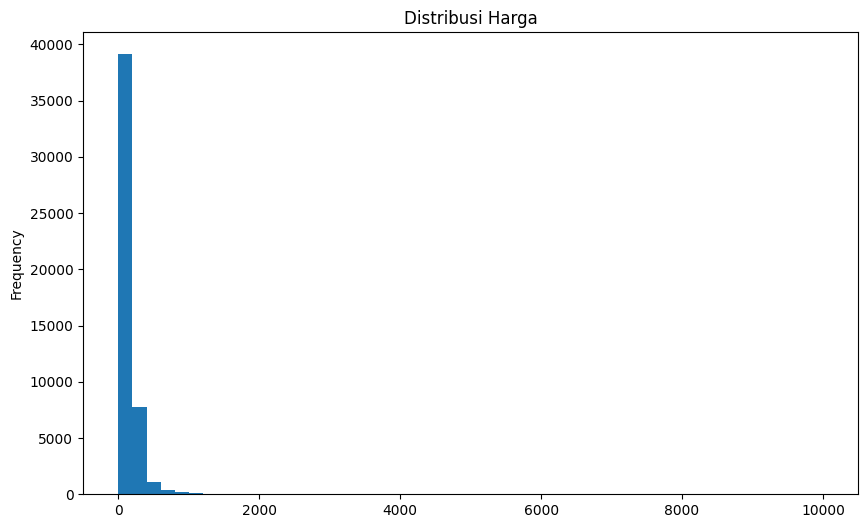

In [14]:
df_airbnb['price'].plot(kind='hist', bins=50, figsize=(10,6), title='Distribusi Harga')


## B. MATLOTLIB

### 1. Plotting

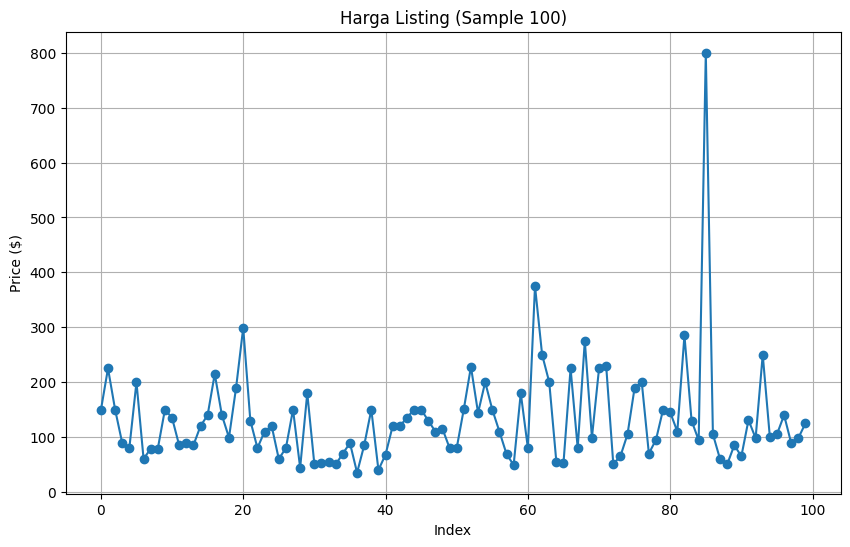

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_airbnb['price'][:100], marker='o')
plt.title('Harga Listing (Sample 100)')
plt.xlabel('Index')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


### 2. Customization

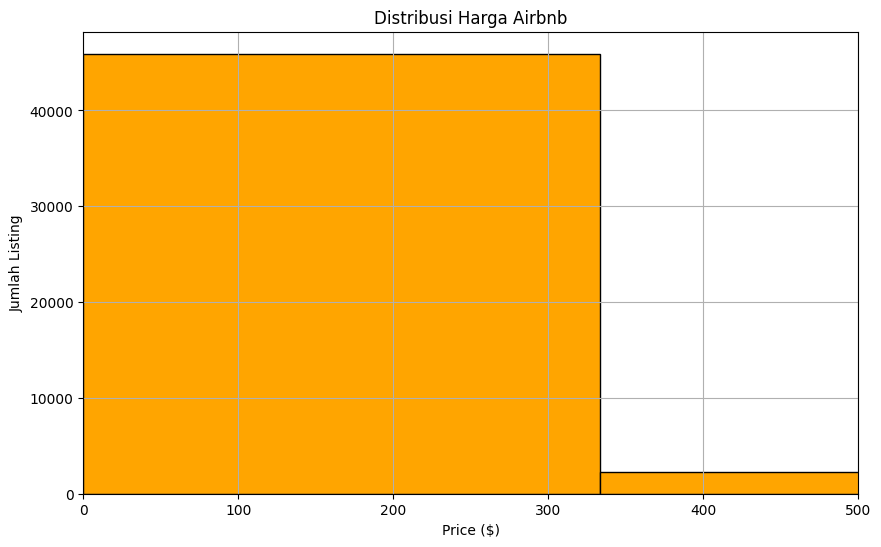

In [16]:
plt.figure(figsize=(10,6))
plt.hist(df_airbnb['price'], bins=30, color='orange', edgecolor='black')
plt.title('Distribusi Harga Airbnb')
plt.xlabel('Price ($)')
plt.ylabel('Jumlah Listing')
plt.xlim(0, 500)
plt.grid(True)
plt.show()


### 3. Subplot

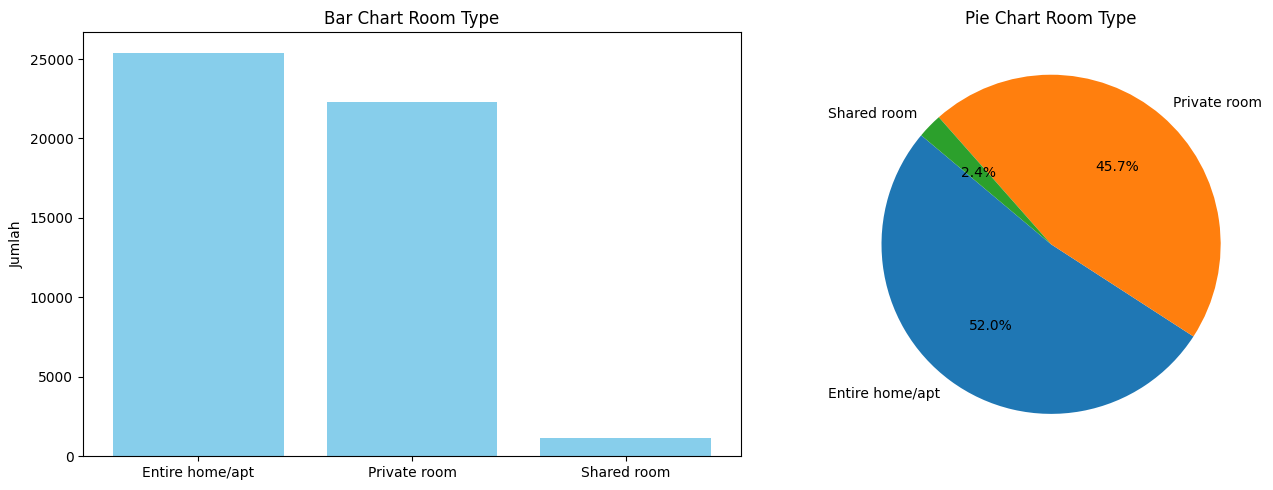

In [17]:
if 'room_type' in df_airbnb.columns:
    room_counts = df_airbnb['room_type'].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(14,5))

    axs[0].bar(room_counts.index, room_counts.values, color='skyblue')
    axs[0].set_title('Bar Chart Room Type')
    axs[0].set_ylabel('Jumlah')

    axs[1].pie(room_counts.values, labels=room_counts.index, autopct='%1.1f%%', startangle=140)
    axs[1].set_title('Pie Chart Room Type')

    plt.tight_layout()
    plt.show()


## 4. Diagram

<Figure size 1000x600 with 0 Axes>

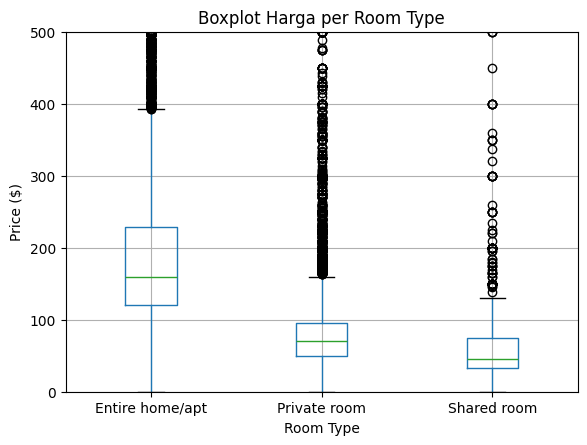

In [18]:
if 'room_type' in df_airbnb.columns:
    plt.figure(figsize=(10,6))
    df_airbnb.boxplot(column='price', by='room_type')
    plt.title('Boxplot Harga per Room Type')
    plt.suptitle('')
    plt.xlabel('Room Type')
    plt.ylabel('Price ($)')
    plt.ylim(0, 500)
    plt.show()


### 5. Seaborn

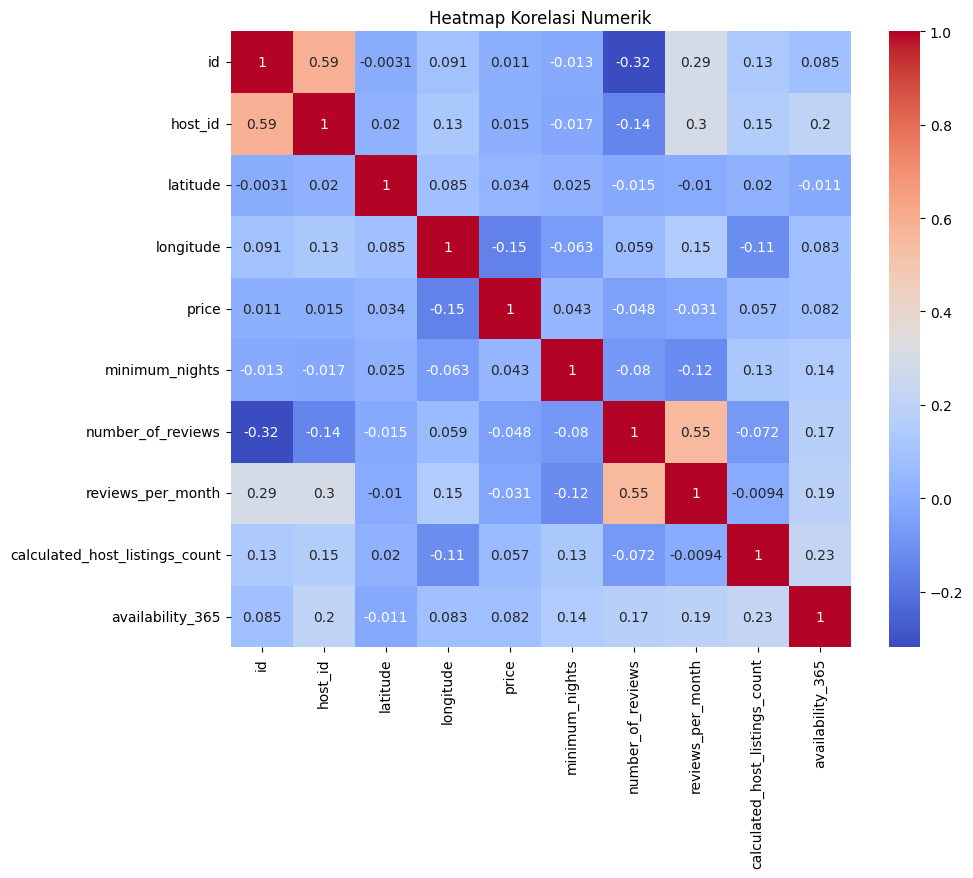

In [19]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df_airbnb.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Numerik')
plt.show()


## C. DATA ANALYSIS & MANIPULATION

In [20]:
if 'neighbourhood' in df_airbnb.columns:
    avg_price = df_airbnb.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
    print("Rata-rata harga per neighbourhood:\n", avg_price.head())


top_10_expensive = df_airbnb.sort_values(by='price', ascending=False).head(10)
top_10_expensive[['name', 'price', 'room_type']]


Rata-rata harga per neighbourhood:
 neighbourhood
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Sea Gate          487.857143
Riverdale         442.090909
Name: price, dtype: float64


,name,price,room_type
29238,1-BR Lincoln Center,10000,Entire home/apt
9151,Furnished room in Astoria apartment,10000,Private room
17692,Luxury 1 bedroom apt. -stunning Manhattan views,10000,Entire home/apt
6530,Spanish Harlem Apt,9999,Entire home/apt
40433,2br - The Heart of NYC: Manhattans Lower East ...,9999,Entire home/apt
12342,"Quiet, Clean, Lit @ LES & Chinatown",9999,Private room
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,8500,Entire home/apt
4377,Film Location,8000,Entire home/apt
29662,East 72nd Townhouse by (Hidden by Airbnb),7703,Entire home/apt
42523,70' Luxury MotorYacht on the Hudson,7500,Entire home/apt
